<a href="https://colab.research.google.com/github/JRzo/Data-Analytics-Projects/blob/main/crime_analysis_los_angeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas
df = pd.read_csv("/content/data2.csv", on_bad_lines="skip")



<ipython-input-79-6f1772878f31>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/data2.csv", on_bad_lines="skip")


In [74]:
#Creating data x, y
# What are the age distributions of victims in different geographical areas?

locations_area = df["AREA NAME"]

locations_amount = {

}

ages_victims = df["Vict Age"]

age_range = {}

for i in locations_area:
  if i in locations_amount:
    locations_amount[i] += 1
  else:
    locations_amount[i] = 1


for a in ages_victims:
  if a in age_range:
    age_range[a] += 1
  else:
    age_range[a] = 1

print(locations_amount)


{'Wilshire': 2546, 'Central': 3042, 'Southwest': 3006, 'Van Nuys': 2352, 'Hollywood': 2704, 'Southeast': 2831, 'Newton': 2650, 'Mission': 2371, 'Rampart': 2353, 'West Valley': 2176, 'West LA': 2443, 'Olympic': 2536, 'Hollenbeck': 2090, 'Topanga': 2163, 'Northeast': 2198, '77th Street': 3576, 'Pacific': 3005, 'N Hollywood': 2729, 'Harbor': 2304, 'Foothill': 1950, 'Devonshire': 2124, nan: 2}


In [73]:
# Which descent has the higher crime rate?

# Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O -
#Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

decent_amount = {

}

descent_victims = df["Vict Descent"]

for i in descent_victims:
  if i in decent_amount:
    decent_amount[i] += 1
  else:
    decent_amount[i] = 1

print(decent_amount)



{'O': 4308, 'X': 4820, 'H': 16538, 'B': 7671, 'W': 11273, nan: 6699, 'A': 1188, 'C': 128, 'K': 224, 'J': 50, 'F': 144, 'I': 35, 'V': 39, 'S': 3, 'P': 12, 'Z': 8, 'D': 2, 'U': 6, 'G': 3}


([<matplotlib.patches.Wedge at 0x7a418c8d2560>,
 [Text(9.18464866533358, 6.359674794839523, 'O'),
  Text(8.269837188455393, 7.944174716451816, 'X'),
  Text(3.509553061772004, 9.139875351303079, 'H'),
  Text(1.3098495870479692, 2.603588113493434, 'B'),
  Text(6.359674990737061, 0.8153513983173957, 'W'),
  Text(8.920428809292506, 3.0024420030273586, 'nan'),
  Text(9.294033802181335, 4.040169959980354, 'A'),
  Text(9.345828736278289, 4.311688591596901, 'C'),
  Text(9.370840196084572, 4.494276775012876, 'K'),
  Text(9.388183717129673, 4.677752168792387, 'J'),
  Text(9.396140462490866, 4.815747363517908, 'F'),
  Text(9.39975874775796, 4.953924393359353, 'I')],
 [Text(7.282535635636497, 5.741640797185195, '10.0%'),
  Text(6.783547557339305, 6.60591348170099, '3.3%'),
  Text(4.18702894278473, 7.258113827983498, '34.3%'),
  Text(2.987190683844347, 3.6928662437236914, '23.0%'),
  Text(5.741640904038396, 2.7174643990822163, '18.7%'),
  Text(7.138415714159548, 3.910422910742196, '6.3%'),
  Text(7

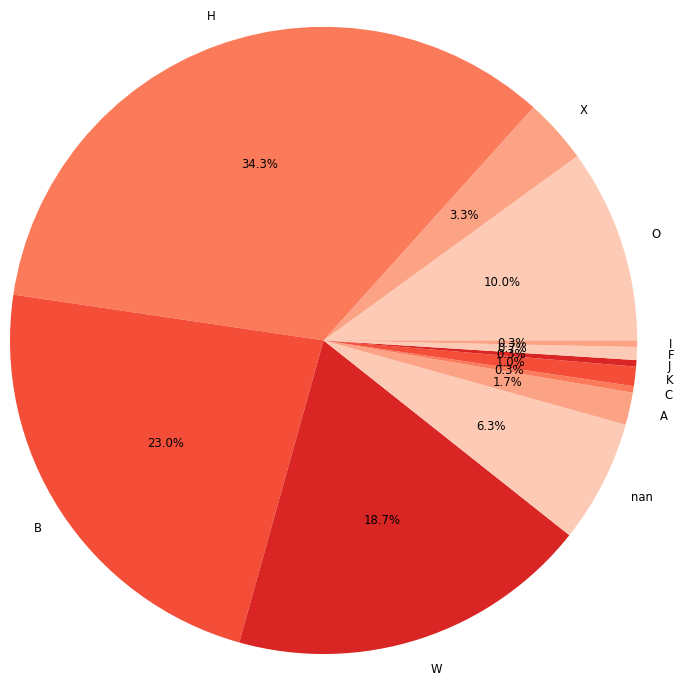

In [4]:
# Creating a pie chart to show the descent

plt.style.use("_mpl-gallery-nogrid")

fig, ax = plt.subplots()
colors = plt.get_cmap("Reds")(np.linspace(0.2, 0.7, 5))

# plot

ax.pie(decent_amount.values(), labels=decent_amount.keys(), radius=4, center=(5,5), colors=colors, autopct='%1.1f%%',
        textprops={'size': 'smaller'},)

In [72]:
# Out of 500 how many people have been arrested?

percentage = df["Status Desc"].value_counts()

print(percentage)

print(f"\nOut of 500, only 18 have been arrested {(18/500) * 100}%")


Status Desc
Invest Cont     40551
Adult Other      6819
Adult Arrest     5465
Juv Arrest        219
Juv Other          95
Name: count, dtype: int64

Out of 500, only 18 have been arrested 3.5999999999999996%


In [6]:
# The average age of the victim's
mean_ages = ages_victims.mean()
# Oldest victim/min victim
oldest_age = ages_victims.max()
# Youngest victim/max victim
min_age = ages_victims.min()


print(f"The average age of the victims is {mean_ages}")
print(f"The oldest victim is {oldest_age}")
print(f"The youngest victim is {min_age}")

The average age of the victims is 31.696666666666665
The oldest victim is 81.0
The youngest victim is -2.0


0       0.0
1      47.0
2      19.0
3      19.0
4      28.0
       ... 
295    31.0
296    19.0
297    50.0
298    23.0
299    53.0
Name: Vict Age, Length: 300, dtype: float64


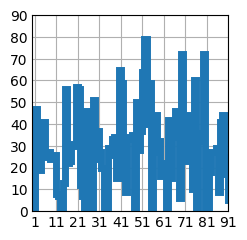

In [7]:
# What are the age distributions of victims in different geographical areas?

plt.style.use('_mpl-gallery')

fix, ax = plt.subplots()


print(ages_victims)

ax.stairs(ages_victims, linewidth=5)
ax.set(xlim =(0, 20), xticks=np.arange(1,100, step=10),
       ylim=(0, 20), yticks=np.arange(0,100, step=10))


plt.show()


In [77]:
# Out of the sample, what is the percentage of hispanics that commits a crime

print(f"Out of {len(descent_victims)} there is {decent_amount['H']} that are hispanic")
print(f"Meaning {(decent_amount['H'] / len(descent_victims)) * 100}% are hispanic")


# Out of the percentage, how many of them get arrested?

value_arrested = df[df["Status Desc"] == "Adult Arrest"]
hispanic = df[df["Vict Descent"] == "H"]

arrest_combined = []


hispanic_arrest_val = 0

for n in (hispanic['Status Desc'] == "Adult Arrest"):
  if n == True:
    hispanic_arrest_val += 1


print((hispanic_arrest_val/ len(df)) * 100)

Out of 53151 there is 16538 that are hispanic
Meaning 31.115124833022893% are hispanic
3.7315633769842838


{'March': 53410, 'February': 51304, 'November': 54009, 'August': 56685, 'December': 55175, 'July': 57092, 'May': 55629, 'October': 57350, 'January': 54481, 'September': 54538, 'April': 52798, 'June': 55317}


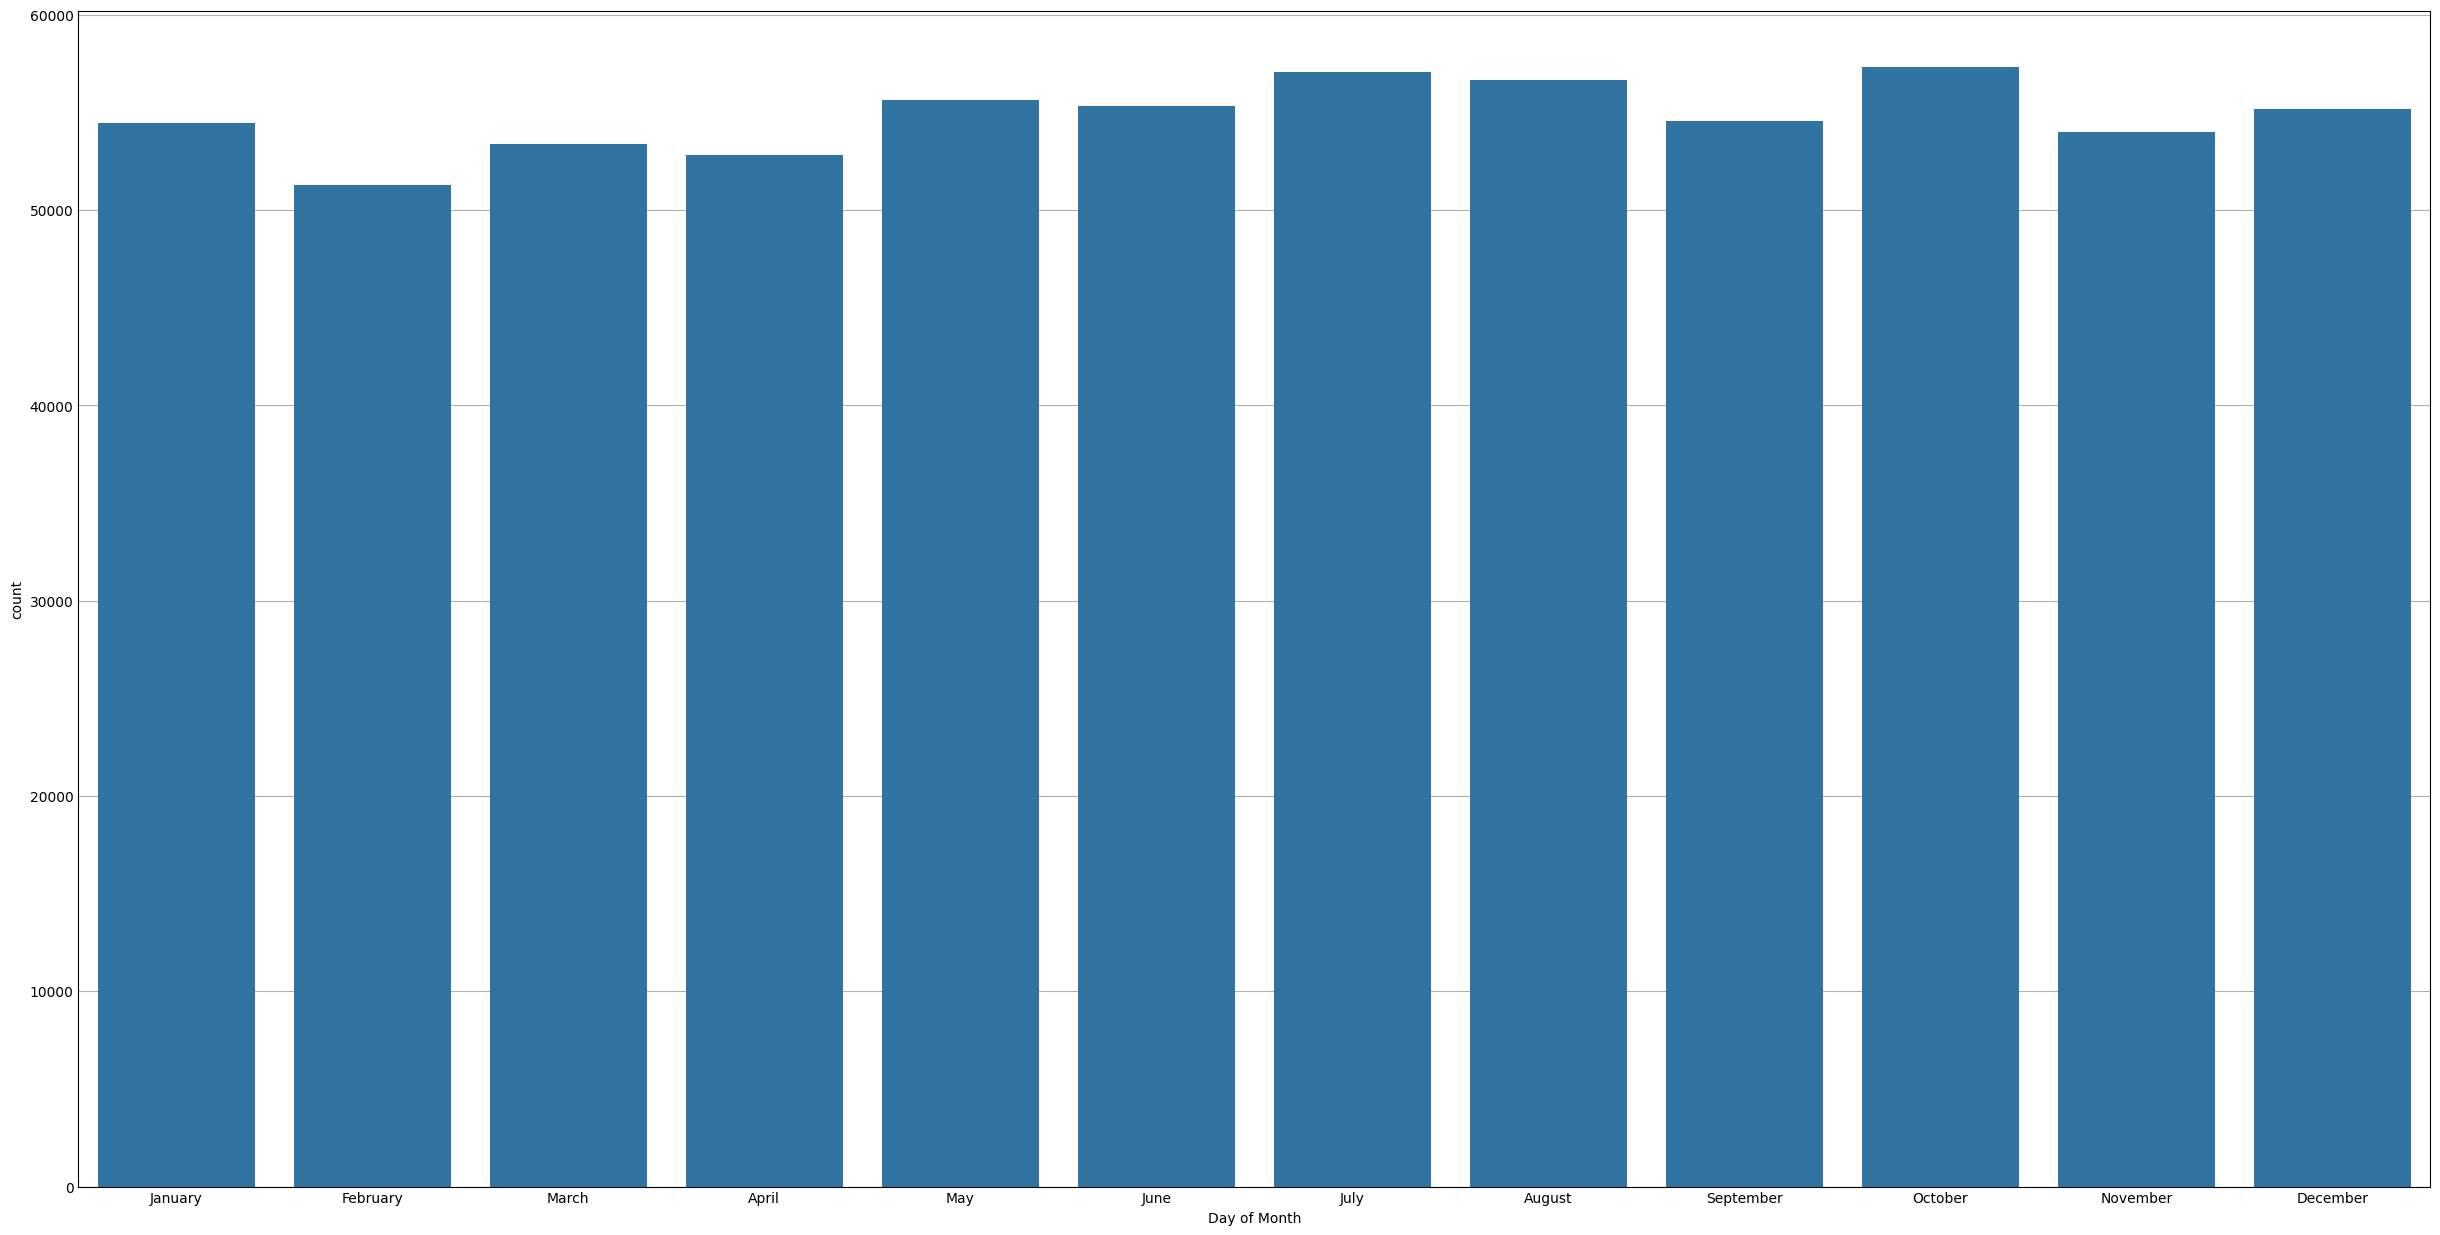

In [144]:
# Mapping the Months
# Filling missing values in DATA OCC

df['TIME OCC'].fillna(df['TIME OCC'].median(), inplace=True)

# Convering to datetime
df.dropna(subset=['Date Rptd', 'DATE OCC'], inplace=True)
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')


months = df['Day of Month'] = df['DATE OCC'].dt.month_name()

months_activity = {
    'March': 0, 'February': 0, 'November': 0, 'August': 0, 'December': 0, 'July': 0, 'May': 0, 'October': 0, 'January': 0, 'September': 0, 'April': 0, 'June': 0

}
for i in months:
  months_activity[i] += 1



print(months_activity)

plt.figure(figsize=(24,12))
sns.countplot(x='Day of Month', data=df, order=["January", "February", "March","April",
                                               "May", "June", "July", "August", "September",
                                               "October", "November", "December"])

plt.show()
